In [24]:
library('glmnet')
library('pROC')
library('survival')
rename <- function(X){
    rownames(X) <- X$patients
    print(dim(X[,-1]))
    return(X[,-1])
}

X_chk_density <- rename(read.csv('X_chk_density'))
X_chk_overall_patient <- rename(read.csv('X_chk_overall_pat'))

group <- read.csv('group',header = FALSE)[,-1]
time <- read.csv('Y',header = FALSE)[,-1]
censor <- read.csv('censor',header = FALSE)[,-1]
status = censor#rep(1,length(time))#censor
BN <- read.csv('BN',header = FALSE)[,-1]

[1]  35 119
[1] 35 15


In [25]:
# survival tests
tests <- c('CD4.PD.1._9', 'Treg.ICOS._6','CD68.CD163.Ki67._6', 'Treg.ICOS._7', 'Treg.Ki67._4')
for (test in tests){
dat <-  data.frame(time = time, status = status,group = group,nbd = X_chk_density[,test])
mod0 <- coxph(Surv(time,status) ~nbd, data = dat[group==1,])
print(summary(mod0))}

Call:
coxph(formula = Surv(time, status) ~ nbd, data = dat[group == 
    1, ])

  n= 18, number of events= 13 

       coef exp(coef) se(coef)      z Pr(>|z|)   
nbd -0.8995    0.4068   0.3245 -2.772  0.00557 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
nbd    0.4068      2.458    0.2153    0.7683

Concordance= 0.743  (se = 0.066 )
Rsquare= 0.363   (max possible= 0.966 )
Likelihood ratio test= 8.13  on 1 df,   p=0.004
Wald test            = 7.68  on 1 df,   p=0.006
Score (logrank) test = 9.25  on 1 df,   p=0.002

Call:
coxph(formula = Surv(time, status) ~ nbd, data = dat[group == 
    1, ])

  n= 18, number of events= 13 

       coef exp(coef) se(coef)     z Pr(>|z|)
nbd -0.2764    0.7585   0.5117 -0.54    0.589

    exp(coef) exp(-coef) lower .95 upper .95
nbd    0.7585      1.318    0.2782     2.068

Concordance= 0.574  (se = 0.083 )
Rsquare= 0.016   (max possible= 0.966 )
Likelihood ratio test= 0.3  on 1 df,   p

In [8]:

## overall frequency
dat <-  data.frame(time = time, status = status,group = group,nbd = X_chk_overall_patient$freq.CD4.PD.1.)
mod1 <- coxph(Surv(time,status) ~nbd, data = dat[group==1,])
print(summary(mod1))

Call:
coxph(formula = Surv(time, status) ~ nbd, data = dat[group == 
    1, ])

  n= 18, number of events= 13 

       coef exp(coef) se(coef)      z Pr(>|z|)
nbd -0.5581    0.5723   0.3658 -1.526    0.127

    exp(coef) exp(-coef) lower .95 upper .95
nbd    0.5723      1.747    0.2794     1.172

Concordance= 0.625  (se = 0.079 )
Rsquare= 0.12   (max possible= 0.966 )
Likelihood ratio test= 2.31  on 1 df,   p=0.1
Wald test            = 2.33  on 1 df,   p=0.1
Score (logrank) test = 2.41  on 1 df,   p=0.1



In [3]:
library(visreg)

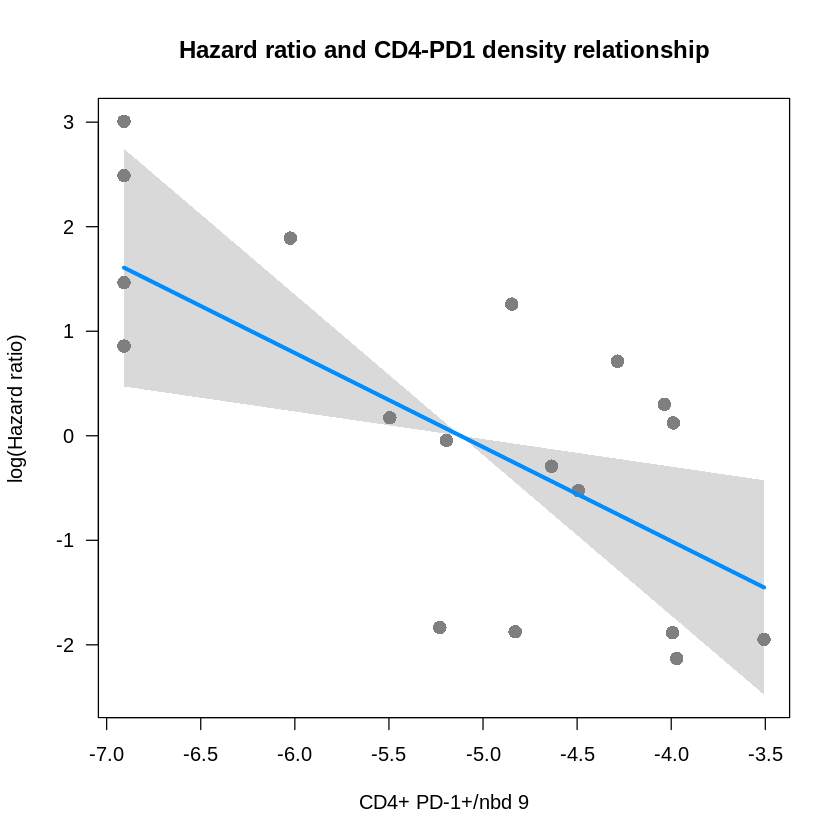

In [5]:
visreg(mod0, "nbd", ylab="log(Hazard ratio)",xlab = 'CD4+ PD-1+/nbd 9',main = 'Hazard ratio and CD4-PD1 density relationship',points=list(cex=1.5, pch=16))

In [9]:
## ANOVA
dat <-  data.frame(time = time, status = status,group = group,overall = X_chk_overall_patient$freq.CD4.PD.1.,nbd = X_chk_density$CD4.PD.1._9)
mod2 <- coxph(Surv(time,status) ~nbd, data = dat[group==1,])
print(anova(mod1,mod2))

Analysis of Deviance Table
 Cox model: response is  Surv(time, status)
 Model 1: ~ nbd
 Model 2: ~ nbd
   loglik  Chisq Df P(>|Chi|)    
1 -29.354                        
2 -26.446 5.8161  0 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
